In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


2022-11-15 09:19:34.050302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 09:19:34.570794: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 09:19:34.703313: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 09:19:34.703352: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
train_path = 'images_data/train'
valid_path = 'images_data/validation' 
test_path = 'images_data/predict/'

In [3]:
name_of_people = ['amey', 'sandesh', 'vailantan', 'nathan', 'shoydon', 'vedant', 'manasvi', 'srijita']

In [4]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#   .flow_from_directory(train_path, target_size=(640,480), classes = name_of_people, batch_size=10)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#   .flow_from_directory(valid_path, target_size=(640, 480), 
#   classes=name_of_people, batch_size=10)

In [5]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) .flow_from_directory(train_path, target_size=(640, 480), classes=name_of_people, batch_size=30, shuffle=True)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(640,480), 
#   classes=name_of_people, batch_size=30, shuffle=True)

train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) .flow_from_directory(train_path, target_size=(640, 480), classes=name_of_people, batch_size=10, shuffle=True)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(640,480), 
  classes=name_of_people, batch_size=10, shuffle=True)


Found 370 images belonging to 8 classes.
Found 91 images belonging to 8 classes.


In [6]:
imgs, labels = next(train_batches)
print(imgs)

[[[[ -25.939003     -1.7789993   -10.68      ]
   [ -30.939003     -4.7789993   -26.68      ]
   [ -30.939003     -3.7789993   -35.68      ]
   ...
   [  86.061        97.221        55.32      ]
   [  94.061       107.221        60.32      ]
   [  95.061       109.221        59.32      ]]

  [[ -26.939003     -5.7789993   -13.68      ]
   [ -29.939003     -6.7789993   -27.68      ]
   [ -32.939003     -7.7789993   -36.68      ]
   ...
   [  81.061        90.221        48.32      ]
   [  87.061       100.221        53.32      ]
   [  93.061       107.221        57.32      ]]

  [[ -26.939003     -5.7789993   -13.68      ]
   [ -29.939003     -6.7789993   -27.68      ]
   [ -32.939003     -7.7789993   -36.68      ]
   ...
   [  81.061        90.221        48.32      ]
   [  87.061       100.221        53.32      ]
   [  93.061       107.221        57.32      ]]

  ...

  [[ -99.939       -42.779       -50.68      ]
   [ -97.939       -40.779       -48.68      ]
   [ -94.939       -37.779

In [7]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

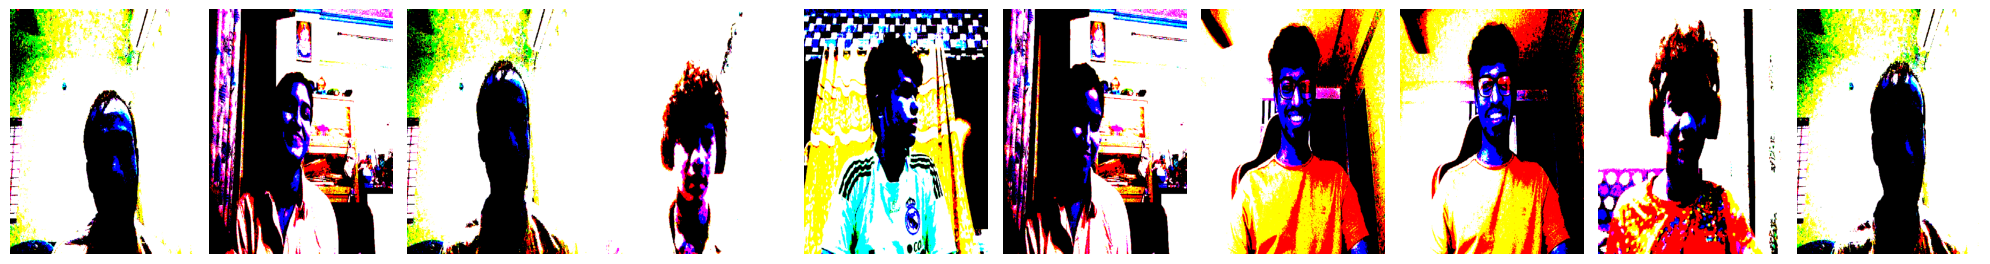

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
  Conv2D(filters=96, kernel_size=(11, 11), activation='relu', padding='same', input_shape=(640, 480, 3), strides=(4,4)), BatchNormalization(), MaxPool2D(pool_size=(3,3), strides=(2,2)),
  Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
  MaxPool2D(pool_size=(3,3), strides=(2,2)),
  Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
  Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'), BatchNormalization(),
  MaxPool2D(pool_size=(3,3), strides=(2,2)), 
  Flatten(),
  Dense(4096, activation='relu'),
  keras.layers.Dropout(0.5),
  Dense(4096, activation='relu'),
  keras.layers.Dropout(0.5),
  Dense(units=len(name_of_people), activation='softmax')])

2022-11-15 09:19:41.786720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 09:19:41.786755: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 09:19:41.786802: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2022-11-15 09:19:41.787038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# model = Sequential([
#   Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(640, 480, 3)), MaxPool2D(pool_size=(2,2), strides=2),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'), 
#   MaxPool2D(pool_size=(2,2), strides=2),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
#   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
#   Flatten(),
#   Dense(units=128, activation='relu'),
#   Dense(units=128, activation='relu'),
#   Dense(units=len(name_of_people), activation='softmax')
# ])

In [11]:
# model.add(tf.keras.layers.Dense(len(name_of_people), activation='softmax'))

In [12]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# model.fit(x=train_batches, epochs=10, verbose=2)
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2, shuffle=True)

Epoch 1/5
37/37 - 109s - loss: 0.6944 - accuracy: 0.8892 - val_loss: 0.1486 - val_accuracy: 1.0000 - 109s/epoch - 3s/step
Epoch 2/5
37/37 - 105s - loss: 0.0276 - accuracy: 0.9946 - val_loss: 0.1777 - val_accuracy: 0.9011 - 105s/epoch - 3s/step
Epoch 3/5
37/37 - 104s - loss: 0.0070 - accuracy: 0.9973 - val_loss: 8.8720e-04 - val_accuracy: 1.0000 - 104s/epoch - 3s/step
Epoch 4/5
37/37 - 104s - loss: 0.0137 - accuracy: 0.9973 - val_loss: 1.5652e-04 - val_accuracy: 1.0000 - 104s/epoch - 3s/step
Epoch 5/5
37/37 - 105s - loss: 6.3429e-04 - accuracy: 1.0000 - val_loss: 5.7744e-06 - val_accuracy: 1.0000 - 105s/epoch - 3s/step


TESTING THE MODEL

In [14]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=test_path, target_size=(640, 480), classes=name_of_people, batch_size=20, shuffle=False)

Found 78 images belonging to 8 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

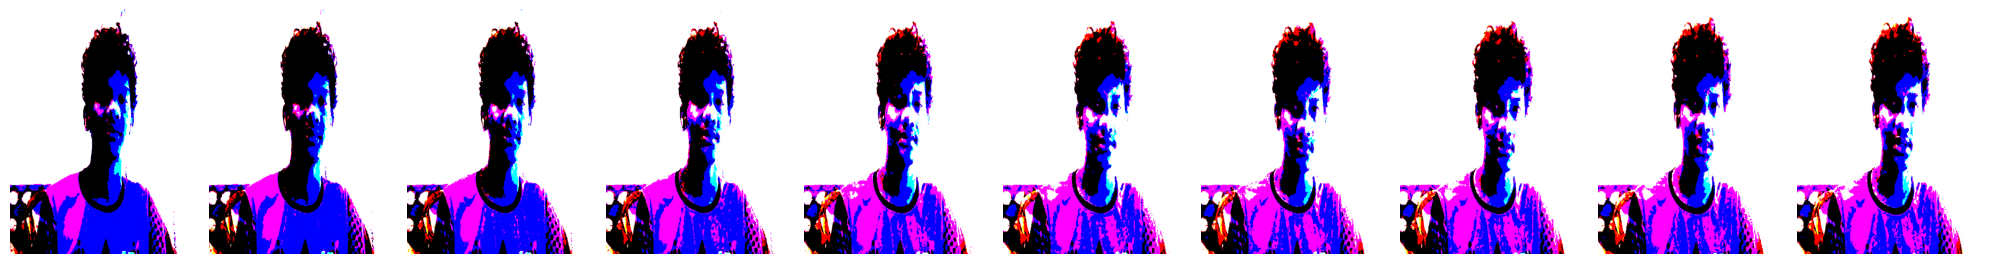

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [15]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [16]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [20]:
test_batches.class_indices

{'amey': 0,
 'sandesh': 1,
 'vailantan': 2,
 'nathan': 3,
 'shoydon': 4,
 'vedant': 5,
 'manasvi': 6,
 'srijita': 7}

Confusion Matrix, without normalization
[[10  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0]
 [ 0  1  0  0  6  0  3  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  2  0  7  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0 10  0  0  0  0  0]]


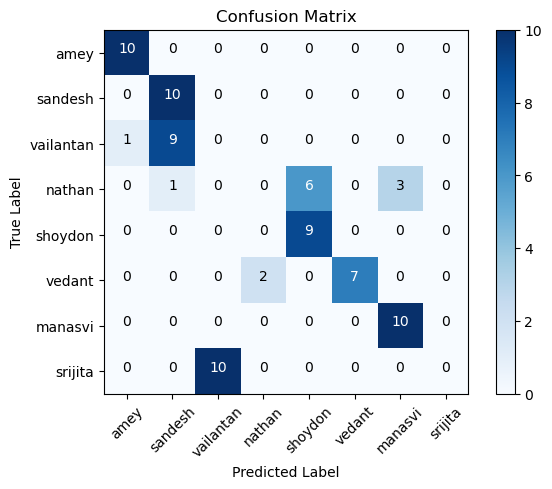

In [21]:
cm_plot_labels = name_of_people
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [22]:
model.evaluate(test_batches)

4/4 [==============================] - 6s 1s/step - loss: 1.3959 - accuracy: 0.5897


[1.3958535194396973, 0.5897436141967773]

In [26]:
model.save('model/facerecognition')

INFO:tensorflow:Assets written to: model/facerecognition/assets


INFO:tensorflow:Assets written to: model/facerecognition/assets


In [24]:
# newModel = keras.models.load_model('model/facerecognition/')

In [25]:
# newModel.summary()